# Comparison of simulation and experimental results by Trinh and Wang, 1982
**Paper**:  
"Large-amplitude free and driven drop-shape oscillations: Experimental observations"  
Trinh and Wang, 1982, [DOI](https://doi.org/10.1017/S0022112082002237)

Comparison is done for figure 10 of the publication, both ratios $L/W=1.47$ and $L/W=1.8$.

In [1]:
from math import exp
import numpy as np
import pandas as pd
from scipy.signal import argrelmax
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from matplotlib import rc

import itertools

# Reproduce plot style from paper
plt.style.use('seaborn-paper')
rc('text', usetex=True)
rc('font', size=18)
rc('lines', linewidth=1.0)
rc('axes', grid=True)
rc('grid', linewidth=0.5)
rc('grid', linestyle='dotted')

# Cannot use mpld3 unfortunerately, seems not to
# work with plt.fill_between(...)
#import mpld3

# Import of repository local modules
import sys
sys.path.append('../../../scripts/modules')
import dataAgglomeration as da

def compute_plot_data(df, col_name, R0, a0):
    maxima = find_peaks(df[col_name].values)
    values_rel = [1.0]
    time_points = [0.0]
    
    for idx in maxima[0]:
        values_rel.append((df.loc[idx, col_name] - R0)/a0)
        time_points.append(df.loc[idx, "time"])
        
    return time_points, values_rel

#------------------------------------------------------------
study_name_lw147 = "trinh1982fig10lw147.parameter"
case_0_name_lw147 = study_name_lw147 + "_00000_template_copy_hexrefined"

study_name_lw180 = "trinh1982fig10lw180.parameter"
case_0_name_lw180 = study_name_lw180 + "_00000_template_copy_hexrefined"

df_lw147 = da.data_agglomerator(study_name_lw147, case_0_name_lw147).study_dataframe()
df_lw180 = da.data_agglomerator(study_name_lw180, case_0_name_lw180).study_dataframe()

# Assumption: both studies use the same resolutions
resolutions = list(df_lw147.index.levels[0])

lw147_data = dict()
lw180_data = dict()

# Equivalent droplet radius for a volume of V=1cm^3
R0 = 6.2e-3

for n in resolutions:
    lw147_data[n] = compute_plot_data(df_lw147.loc[n], "semi-axes-x", R0, (8.02e-3 - R0))
    lw180_data[n] = compute_plot_data(df_lw180.loc[n], "semi-axes-x", R0, (9.7195e-3 - R0))
#------------------------------------------------------------

# Reference data
df_ref_lw147 = pd.read_csv("reference_data/trinh1982_figure10_lw147.csv", comment="#")
df_ref_lw180 = pd.read_csv("reference_data/trinh1982_figure10_lw180.csv", comment="#")

../../../scripts/modules/dataAgglomeration.py:347: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  self.dataframe = pd.concat(data)


### Droplet $L/W = 1.47$

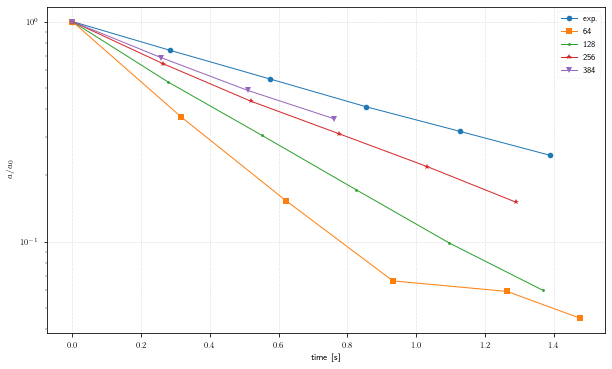

In [2]:
marker = itertools.cycle(('s', '.', '*', 'v'))

#mpld3.enable_notebook()

plt.figure(figsize=(10,6))
plt.xlabel("time [s]")
plt.ylabel("$a/a_0$")

plt.semilogy(df_ref_lw147["time"], df_ref_lw147["relative_amplitude"], label='exp.', marker='o')

for res in resolutions:
    plt.semilogy(lw147_data[res][0], lw147_data[res][1], label=res, marker=next(marker))

plt.legend()

### Droplet $L/W = 1.80$

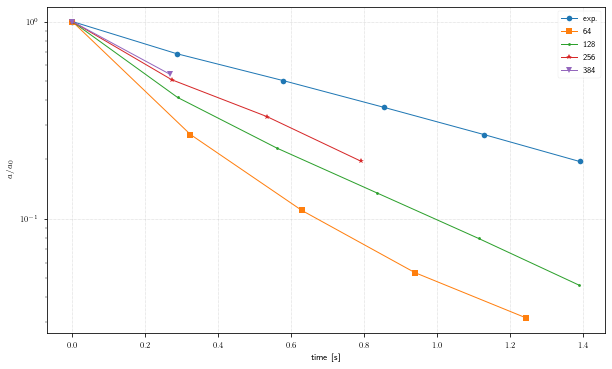

In [3]:
#mpld3.enable_notebook()

plt.figure(figsize=(10,6))
plt.xlabel("time [s]")
plt.ylabel("$a/a_0$")

plt.semilogy(df_ref_lw180["time"], df_ref_lw180["relative_amplitude"], label='exp. ', marker='o')
             
for res in resolutions:
    plt.semilogy(lw180_data[res][0], lw180_data[res][1], label=res, marker=next(marker))

plt.legend()

### Droplet $L/W=1.47$ semi-axis evolution

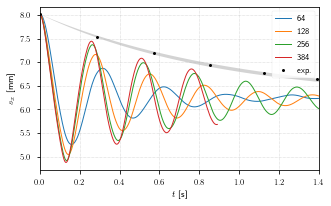

In [4]:
plt.figure(figsize=(5,3))
plt.xlabel("$t$ [s]")
plt.ylabel("$s_x$ [mm]")

# Simulation data
for res in resolutions:
    values = df_lw147.loc[res]["semi-axes-x"].values*1000.0
    plt.plot(df_lw147.loc[res]["time"], values, label=res)
    
# Reference data
tau_min = -1.0
tau_max = -1.113

R0 = 6.2
a0 = 8.02 - R0
time_ref = [x/1000.0 for x in range(1501)]
upper_limit_low = []
upper_limit_high = []

for t in time_ref:
    upper_limit_low.append(R0 + a0*exp(tau_max*t))
    upper_limit_high.append(R0 + a0*exp(tau_min*t))
 
plt.fill_between(time_ref, upper_limit_low, upper_limit_high, facecolor='lightgrey')
#plt.plot(time_ref, upper_limit_low, label="exp.")
#plt.plot(time_ref, upper_limit_high, label="exp.")
plt.plot(df_ref_lw147["time"], R0+a0*df_ref_lw147["relative_amplitude"], label='exp. ',
             marker='o', linestyle='None', color='black', markersize=3)

plt.xlim(0.0,1.4)
plt.legend()
plt.savefig("lw147.pdf", bbox_inches='tight')

### Droplet $L/W=1.80$ semi-axis evolution

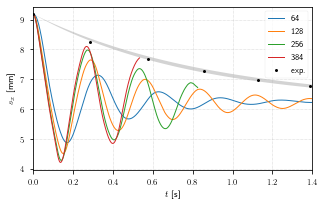

In [5]:
plt.figure(figsize=(5,3))
plt.xlabel("$t$ [s]")
plt.ylabel("$s_x$ [mm]")

# Simulation data
for res in resolutions:
    values = df_lw180.loc[res]["semi-axes-x"].values*1000.0
    plt.plot(df_lw180.loc[res]["time"], values, label=res)
    
# Reference data
tau_min = -1.112
tau_max = -1.242

R0 = 6.2
a0 = 9.1795 - R0
time_ref = [x/1000.0 for x in range(1501)]
upper_limit_low = []
upper_limit_high = []

for t in time_ref:
    upper_limit_low.append(R0 + a0*exp(tau_max*t))
    upper_limit_high.append(R0 + a0*exp(tau_min*t))
 
plt.fill_between(time_ref, upper_limit_low, upper_limit_high, facecolor='lightgrey')
plt.plot(df_ref_lw180["time"], R0+a0*df_ref_lw180["relative_amplitude"], label='exp. ',
             marker='o', linestyle='None', color='black', markersize=3)

plt.xlim(0.0,1.4)
plt.legend()
plt.savefig("lw180.pdf", bbox_inches='tight')